In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
# Load the dataset
data = pd.read_csv("survey lung cancer.csv")

In [5]:
# 1. Introduction
"""
This notebook analyzes a dataset related to lung cancer diagnosis. The goal is to build a classification model
that predicts the presence of lung cancer based on various features such as smoking habits, chronic disease,
and other health indicators.
"""


'\nThis notebook analyzes a dataset related to lung cancer diagnosis. The goal is to build a classification model\nthat predicts the presence of lung cancer based on various features such as smoking habits, chronic disease,\nand other health indicators.\n'

In [6]:
# 2. Data Exploration
# Displayed basic info and statistics
data.info()
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
# Checking for missing values
print("\nMissing values per column:")
print(data.isnull().sum())



Missing values per column:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [8]:
# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())



First few rows of the dataset:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0           

In [9]:
# Check unique values in the target column
print("\nUnique values in target column:", data['LUNG_CANCER'].unique())



Unique values in target column: ['YES' 'NO']


<ipython-input-10-1b7be3989113>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='LUNG_CANCER', palette='Set2')


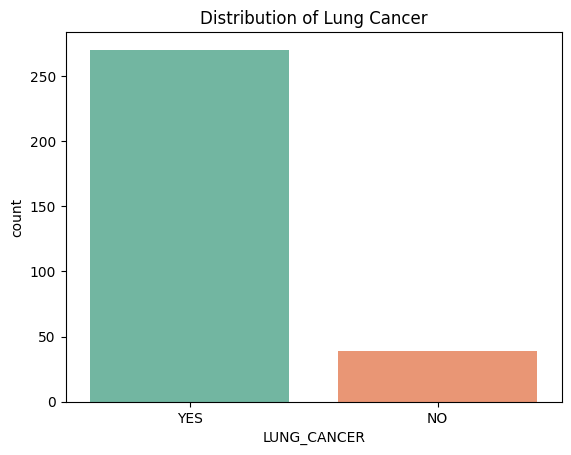

In [10]:
# 3. Data Visualization
sns.countplot(data=data, x='LUNG_CANCER', palette='Set2')
plt.title('Distribution of Lung Cancer')
plt.show()


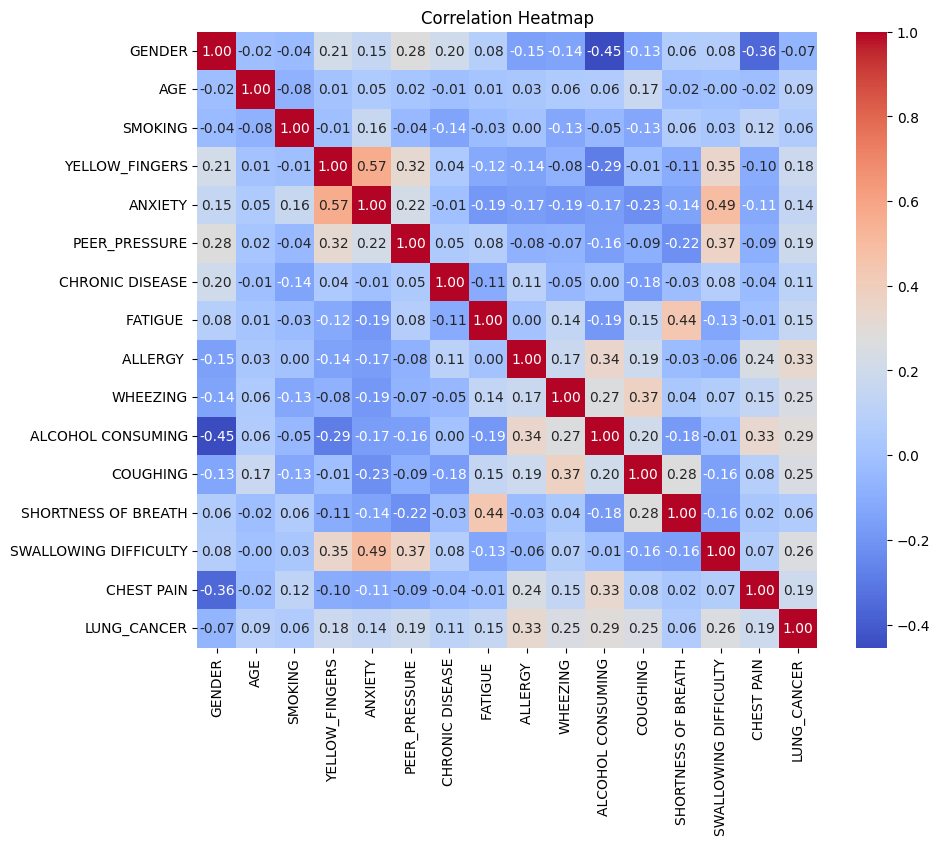

In [11]:
# Encode categorical variables into numerical ones
encoded_data = data.copy()
encoded_data['GENDER'] = encoded_data['GENDER'].map({'M': 0, 'F': 1})
encoded_data['LUNG_CANCER'] = encoded_data['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

# Check correlation matrix
correlation_matrix = encoded_data.corr()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

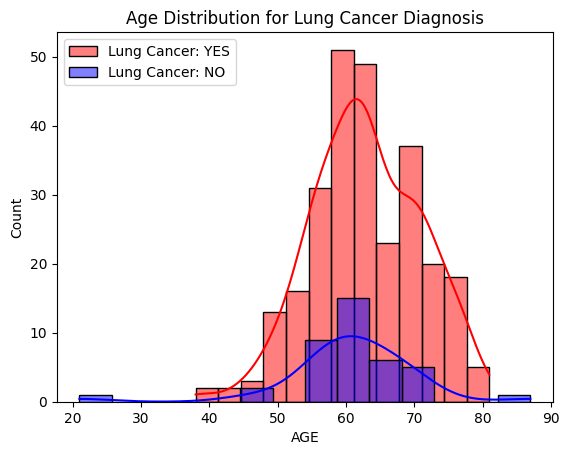

In [12]:
# Age distribution for lung cancer patients
sns.histplot(data[data['LUNG_CANCER'] == 'YES']['AGE'], kde=True, color='red', label='Lung Cancer: YES')
sns.histplot(data[data['LUNG_CANCER'] == 'NO']['AGE'], kde=True, color='blue', label='Lung Cancer: NO')
plt.title('Age Distribution for Lung Cancer Diagnosis')
plt.legend()
plt.show()


<ipython-input-13-b49b8455d73d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='GENDER', palette='coolwarm')


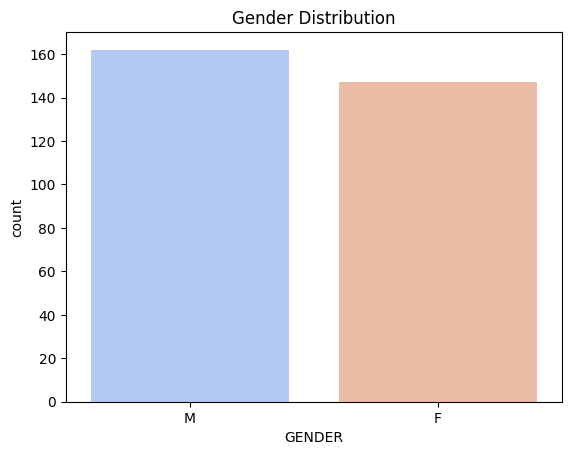

In [13]:
sns.countplot(data=data, x='GENDER', palette='coolwarm')
plt.title('Gender Distribution')
plt.show()

<ipython-input-14-97225ba2efbe>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='LUNG_CANCER', y='AGE', palette='Set2')


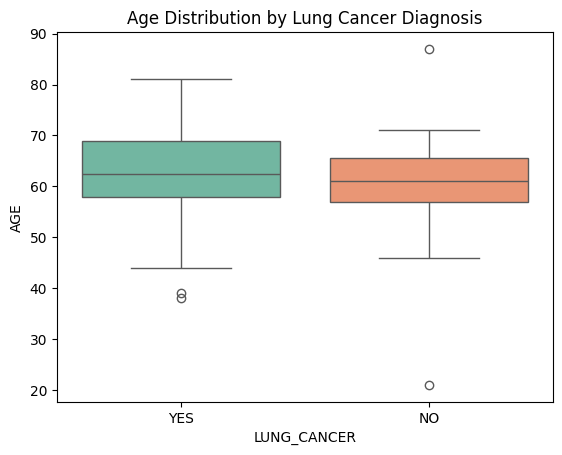

In [14]:
sns.boxplot(data=data, x='LUNG_CANCER', y='AGE', palette='Set2')
plt.title('Age Distribution by Lung Cancer Diagnosis')
plt.show()

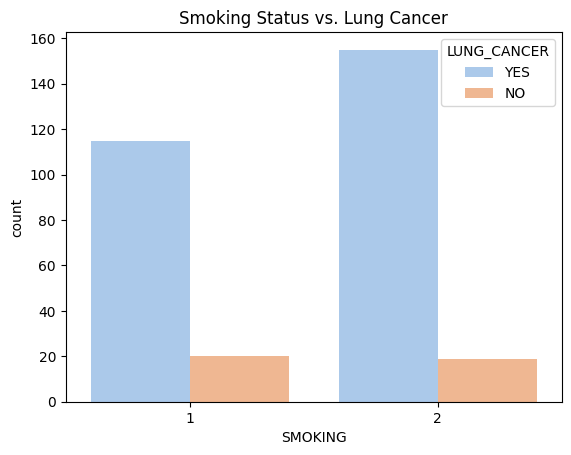

In [15]:
sns.countplot(data=data, x='SMOKING', hue='LUNG_CANCER', palette='pastel')
plt.title('Smoking Status vs. Lung Cancer')
plt.show()

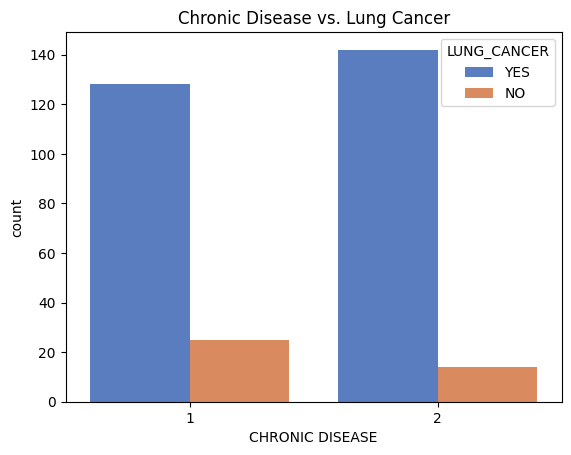

In [16]:
sns.countplot(data=data, x='CHRONIC DISEASE', hue='LUNG_CANCER', palette='muted')
plt.title('Chronic Disease vs. Lung Cancer')
plt.show()

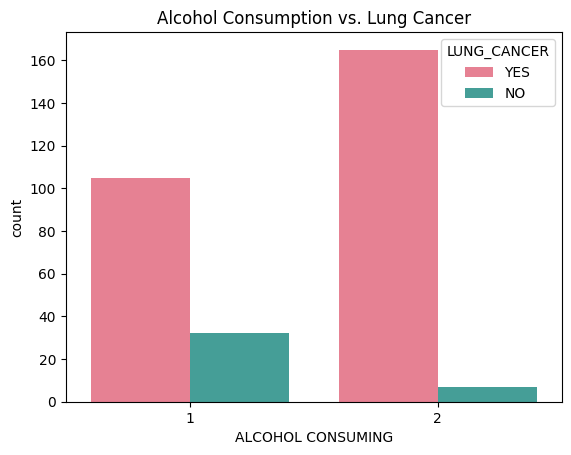

In [17]:
sns.countplot(data=data, x='ALCOHOL CONSUMING', hue='LUNG_CANCER', palette='husl')
plt.title('Alcohol Consumption vs. Lung Cancer')
plt.show()

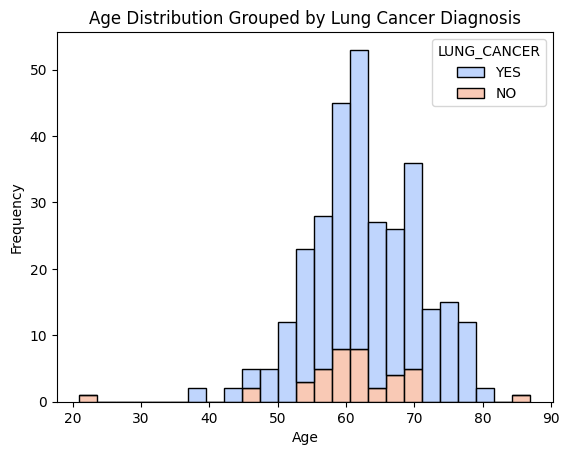

In [18]:
sns.histplot(data=data, x='AGE', hue='LUNG_CANCER', multiple='stack', palette='coolwarm', bins=25)
plt.title('Age Distribution Grouped by Lung Cancer Diagnosis')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [34]:
# Split data into features (X) and target (y)
# Split Data into Features and Target
X = encoded_data.drop('LUNG_CANCER', axis=1)
y = encoded_data['LUNG_CANCER']

In [35]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Standardize numerical features
# eature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.967741935483871
Confusion Matrix:
 [[ 1  1]
 [ 1 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [38]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.967741935483871
Confusion Matrix:
 [[ 1  1]
 [ 1 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [39]:
from sklearn.svm import SVC

#Support Vector Machine (SVM)
# Train SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.967741935483871
Confusion Matrix:
 [[ 1  1]
 [ 1 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [40]:
from sklearn.neighbors import KNeighborsClassifier

#K-Nearest Neighbors (KNN)
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.9354838709677419
Confusion Matrix:
 [[ 1  1]
 [ 3 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62



<ipython-input-41-e1d9cc531ded>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


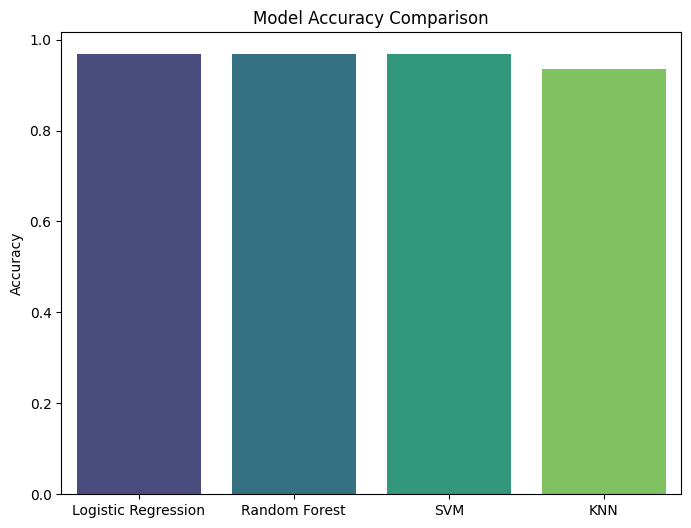

In [41]:
# Model Comparison
# Accuracy Comparison

models = ['Logistic Regression', 'Random Forest', 'SVM', 'KNN']
accuracies = [
    accuracy_score(y_test, y_pred_log_reg),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_knn)
]

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

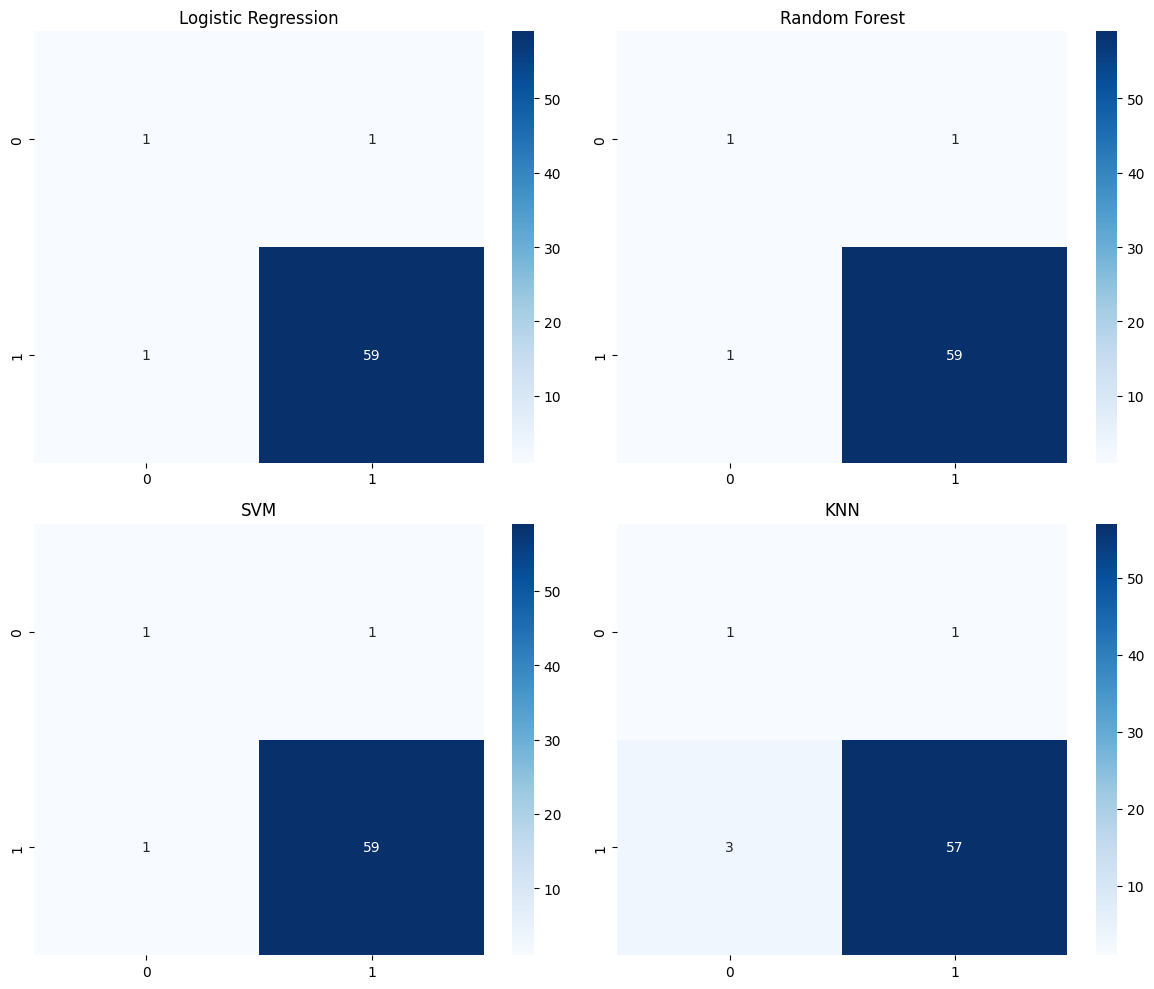

In [42]:
# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title('Logistic Regression')

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=axes[0, 1], cmap='Blues')
axes[0, 1].set_title('Random Forest')

sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', ax=axes[1, 0], cmap='Blues')
axes[1, 0].set_title('SVM')

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', ax=axes[1, 1], cmap='Blues')
axes[1, 1].set_title('KNN')

plt.tight_layout()
plt.show()